In [ ]:
# https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn import preprocessing

# model packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# postprocessing packages
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, f1_score, confusion_matrix
from sklearn.tree import plot_tree


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cleaning Dataset, Exploratory Data Analysis

**Key Info for Reading In The CSV File**


*   Since each person has stored this drive folder (and hence the .csv file) in a different area, we must have a few different input lines
*   Comment out your personal input line of code once finished programming

In [ ]:
#Anna's Input Line [uncomment for use]
#df = pd.read_csv('/content/drive/My Drive/Year 3/Spring Semester/BA476/TermProject/airline.csv', delimiter=',')

# Sahir's Input Line [comment to cancel use]
df = pd.read_csv('/content/drive/MyDrive/College/23 - 24/Sem 2 - S24/BA476/TermProject/airline.csv', delimiter=',')

#Ian's Input Line [uncomment for use]
#df = pd.read_csv('/content/drive/My Drive/TermProject/airline.csv', delimiter=',')

# view data
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
# overview of data variables + types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
# identifying boolean variables + each variable's outcomes

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Customer Type': ['Loyal Customer' 'disloyal Customer']
Unique values in 'Type of Travel': ['Business travel' 'Personal Travel']
Unique values in 'Class': ['Eco' 'Business' 'Eco Plus']
Unique values in 'satisfaction': ['satisfied' 'neutral or dissatisfied']


In [ ]:
# various data cleaning processes like changing variable names

df = df.dropna(axis = 0)
df = df.drop(columns = ['Unnamed: 0', 'id'], axis = 1)

df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype(float)
df.columns = df.columns.str.lower().str.replace(' ', '_', regex = False)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['customer_type'] = df['customer_type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df['type_of_travel'] = df['type_of_travel'].apply(lambda x: 1 if x == 'Business travel' else 0)
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)


df = pd.get_dummies(df, columns=['class'])
df['class_Business'] = df['class_Business'].apply(lambda x: 1 if x == True else 0)
df['class_Eco'] = df['class_Eco'].apply(lambda x: 1 if x == True else 0)
df['class_Eco Plus'] = df['class_Eco Plus'].apply(lambda x: 1 if x == True else 0)

**Dictionary**


*   *gender*: Male = 1; Female = 0
*   *customer_type*: Loyal Customer = 1; Disloyal Customer = 0
*   *type_of_travel*: Business Travel = 1; Personal Travel = 0
*   *satisfaction*: Satisfied = 1; Neutral or Dissatisfied = 0
*   for *class*, opted to use dummy-coding rather than one-hot encoding since *class* has three options

In [ ]:
df.head(5)

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,class_Business,class_Eco,class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,...,5,2,5,5,50.0,44.0,1,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,...,4,3,4,5,0.0,0.0,1,1,0,0
2,1,0,20,1,192,2,0,2,4,2,...,3,2,2,2,0.0,0.0,0,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,...,1,3,1,4,0.0,6.0,1,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,...,2,4,2,4,0.0,20.0,1,0,1,0


In [ ]:
df.shape

(25893, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             25893 non-null  int64  
 1   customer_type                      25893 non-null  int64  
 2   age                                25893 non-null  int64  
 3   type_of_travel                     25893 non-null  int64  
 4   flight_distance                    25893 non-null  int64  
 5   inflight_wifi_service              25893 non-null  int64  
 6   departure/arrival_time_convenient  25893 non-null  int64  
 7   ease_of_online_booking             25893 non-null  int64  
 8   gate_location                      25893 non-null  int64  
 9   food_and_drink                     25893 non-null  int64  
 10  online_boarding                    25893 non-null  int64  
 11  seat_comfort                       25893 non-null  int64  


In [ ]:
df.describe()

,gender,customer_type,age,type_of_travel,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,class_Business,class_Eco,class_Eco Plus
count,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,...,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000,25893.000000
mean,0.493029,0.815317,39.621983,0.694396,1193.753254,2.723709,3.046422,2.755996,2.976442,3.214923,...,3.632681,3.313907,3.648824,3.285521,14.225080,14.740857,0.438922,0.481095,0.445062,0.073842
std,0.499961,0.388048,15.134224,0.460672,998.626779,1.334711,1.532971,1.412552,1.281661,1.331895,...,1.176220,1.269138,1.180650,1.319355,37.185919,37.517539,0.496265,0.499652,0.496982,0.261519
min,0.000000,0.000000,7.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,85.000000,1.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000,1.000000,1.000000,1.000000


#### Exploratory Data Analysis

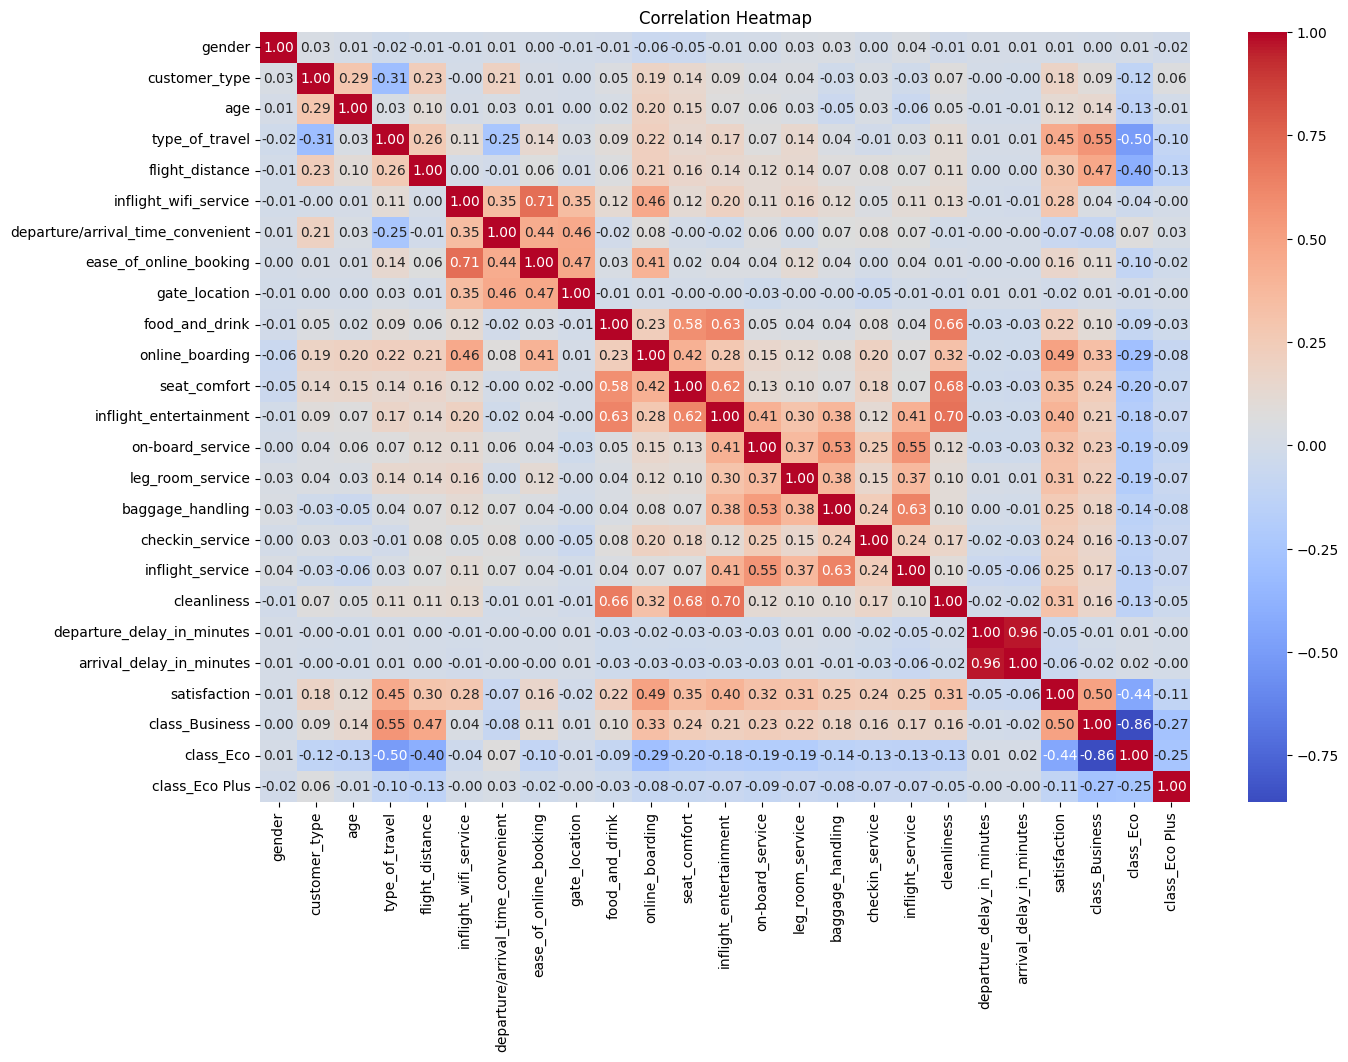

In [ ]:
# visualization 1

correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Key Takeaways from the Heatmap

- **Strong Positive Correlations with Satisfaction**:
  - Factors such as `online boarding`, `inflight entertainment`, `seat comfort`, and `onboard service` show a **strong positive correlation** with overall satisfaction.
  - This suggests that improvements in these areas are likely to have a significant positive impact on customer satisfaction.

- **Negative Correlations with Delays**:
  - Both `departure delay in minutes` and `arrival delay in minutes` have a **strong negative correlation** with satisfaction.
  - This indicates that as delays increase, customer satisfaction tends to decrease significantly.

- **Signs of Multicollinearity**:
  - Strong correlations among some predictors themselves, such as between `online boarding` and `ease of online booking`, `seat comfort` and `inflight entertainment`, and `on-board service` and `leg room service`.
  - This multicollinearity can be problematic for statistical analyses as it can inflate the variance of coefficient estimates and make the model unstable.

- **Weak Correlations for Demographic Variables**:
  - Demographic variables such as `gender`, `age`, and `customer_type` have weak correlations with satisfaction.
  - These factors alone are not strong predictors of satisfaction when compared to service-related factors.

Service quality factors are more influential on satisfaction than demographic variables or flight delays. However, caution should be taken when modeling these predictors due to potential multicollinearity.


<ipython-input-25-7a32ef4f9c3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaction', palette="mako")


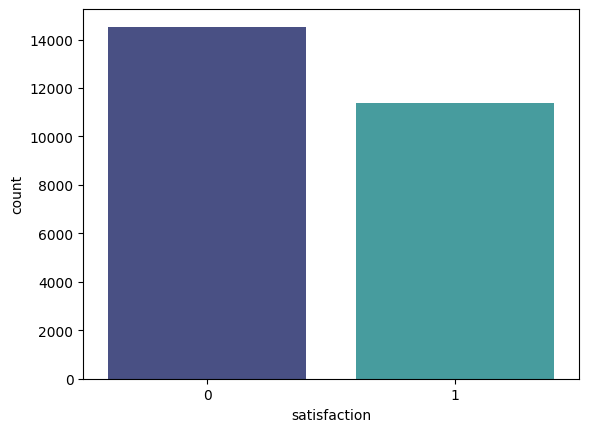

In [ ]:
# visualization 2 - difference in amount of satisfied vs. not
sns.countplot(data=df, x='satisfaction', palette="mako")
plt.show();

gender
0    13127
1    12766
Name: count, dtype: int64
customer_type
1    21111
0     4782
Name: count, dtype: int64
age
39    720
25    711
40    634
41    631
43    625
     ... 
75     15
74     14
78     11
79     10
85      8
Name: count, Length: 75, dtype: int64
type_of_travel
1    17980
0     7913
Name: count, dtype: int64
flight_distance
337     181
594     110
862     104
2475     98
391      95
       ... 
2913      1
3624      1
2501      1
3023      1
3518      1
Name: count, Length: 3279, dtype: int64
inflight_wifi_service
2    6481
3    6298
4    4965
1    4469
5    2868
0     812
Name: count, dtype: int64
departure/arrival_time_convenient
4    6312
5    5573
3    4399
2    4336
1    3899
0    1374
Name: count, dtype: int64
ease_of_online_booking
2    6021
3    5927
4    4854
1    4342
5    3556
0    1193
Name: count, dtype: int64
gate_location
3    7122
4    6023
2    4823
1    4415
5    3510
Name: count, dtype: int64
food_and_drink
4    6183
5    5626
3    5474
2    537

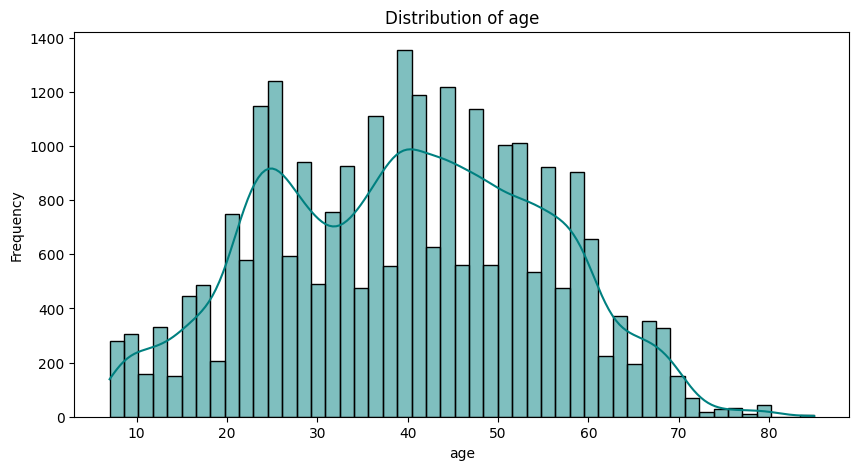

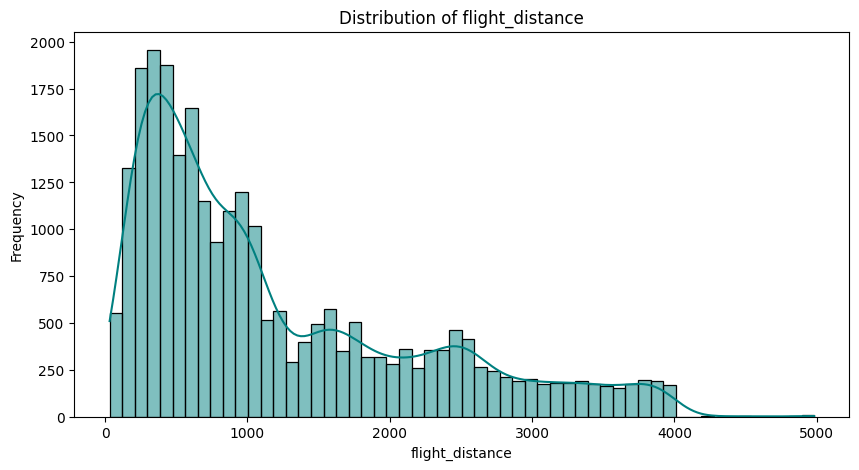

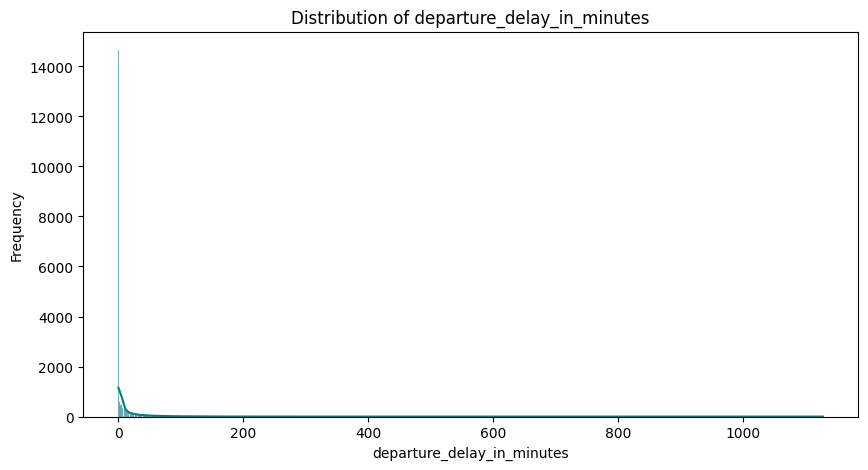

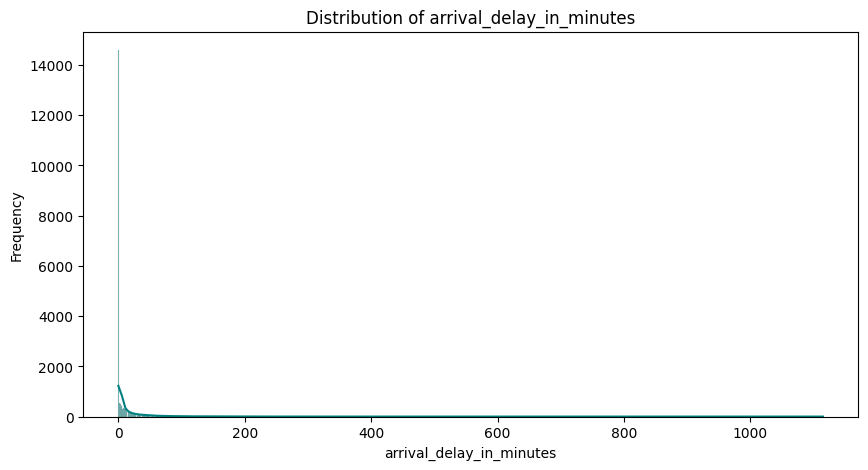

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


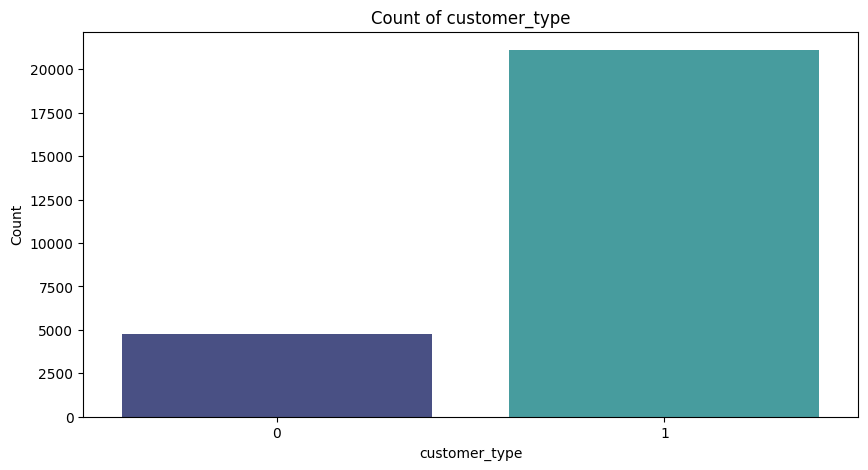

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


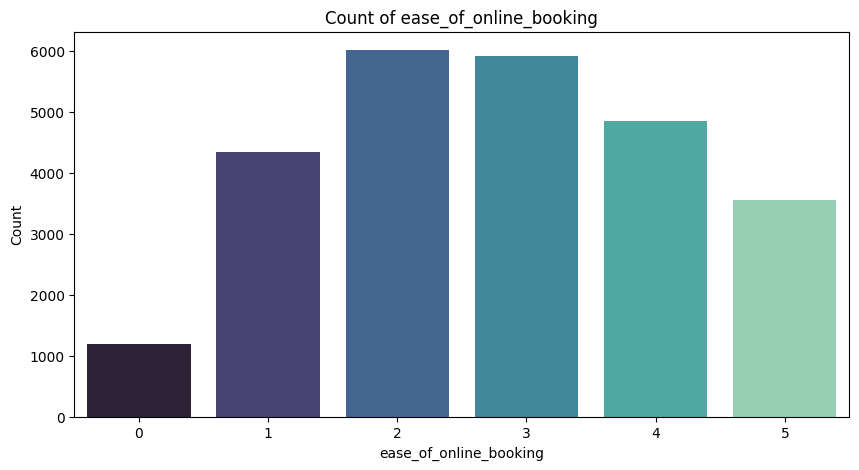

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


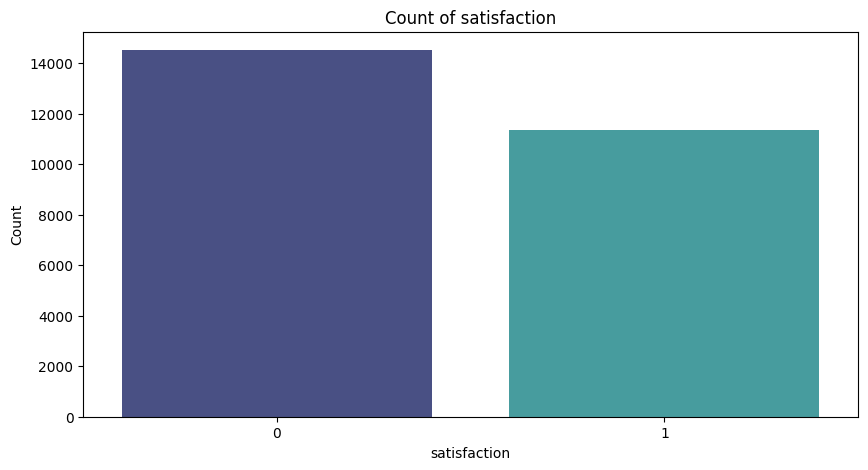

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


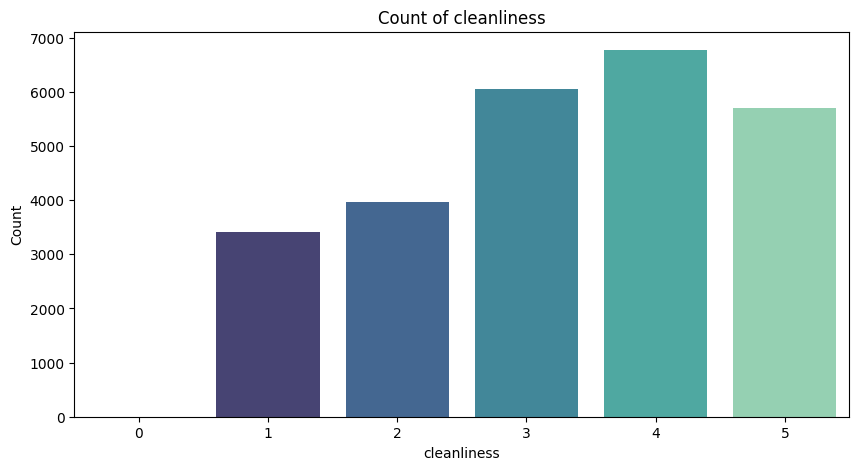

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


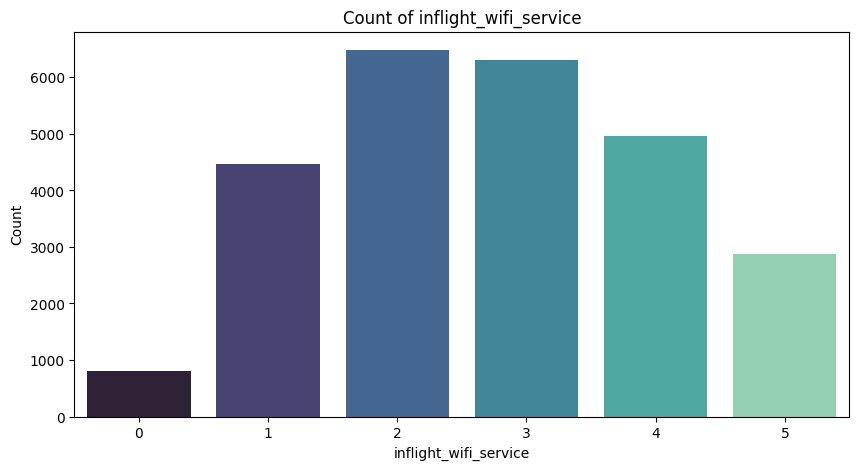

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


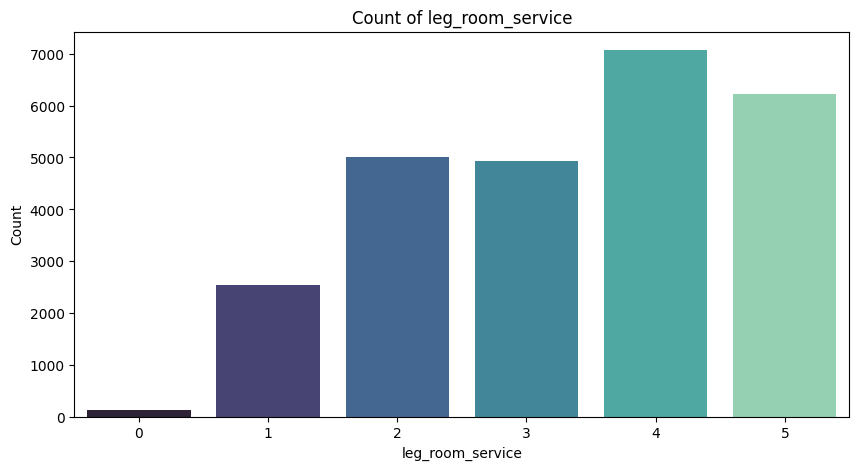

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


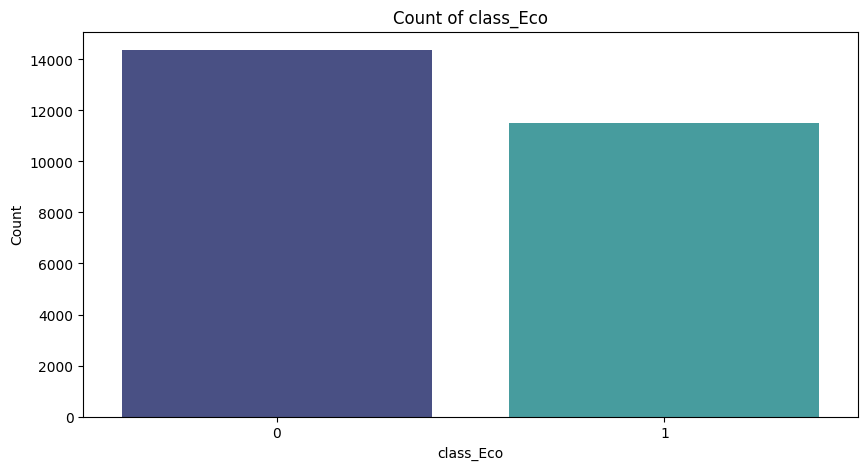

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


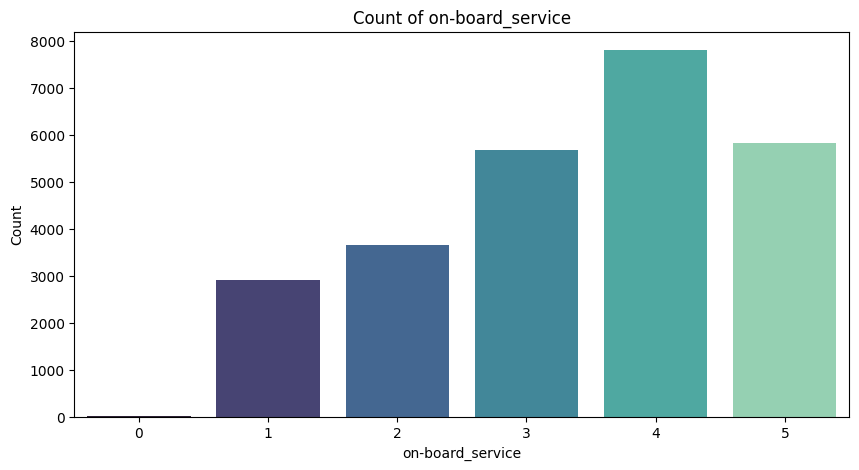

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


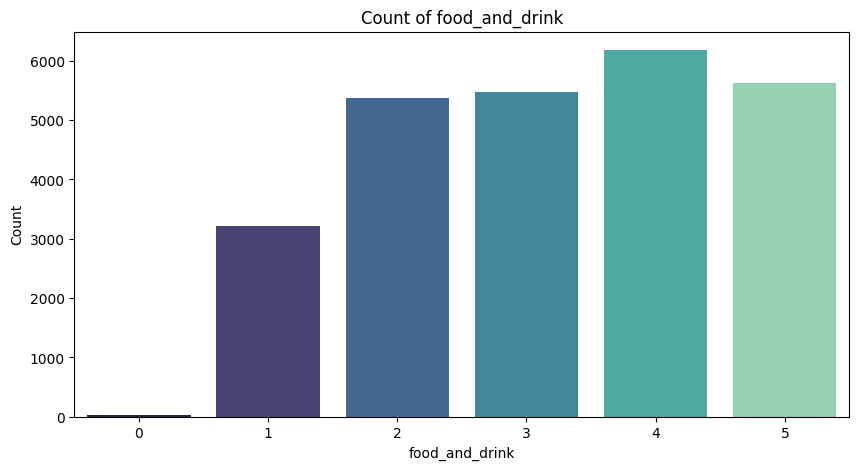

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


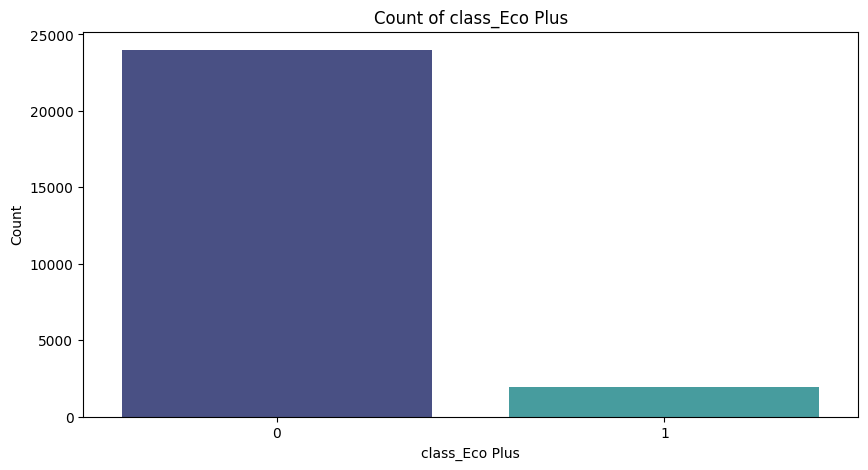

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


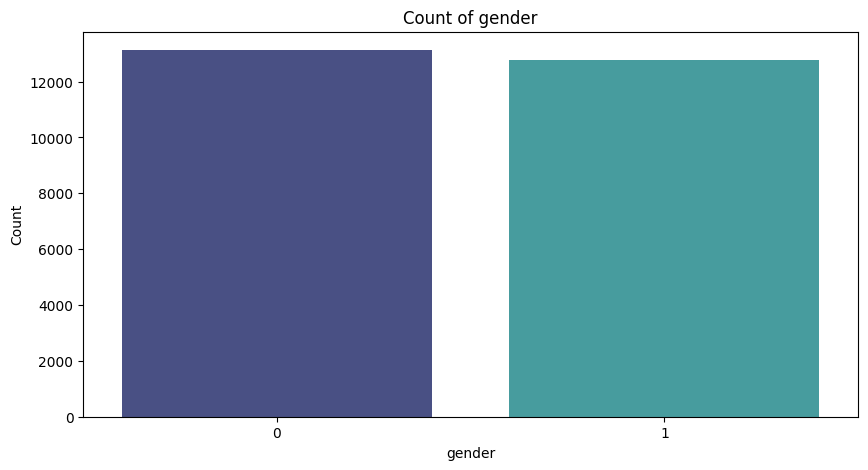

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


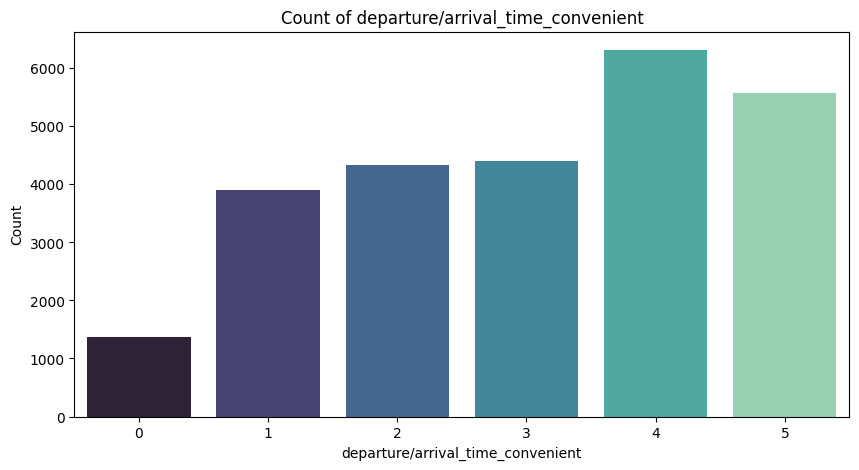

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


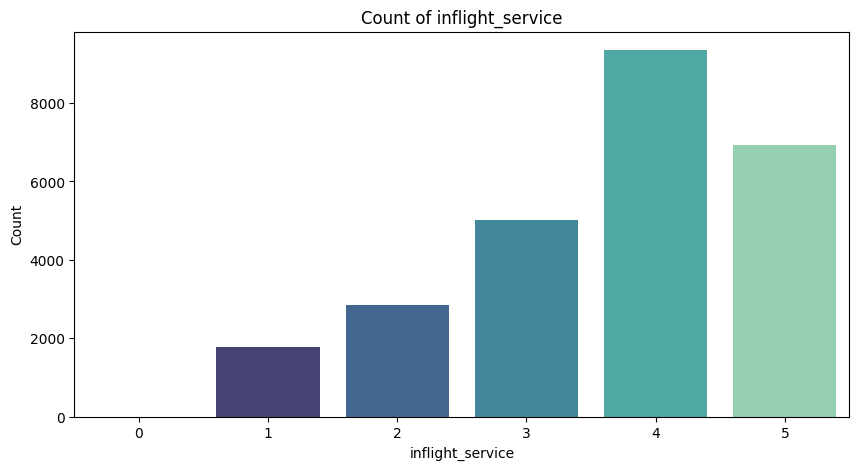

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


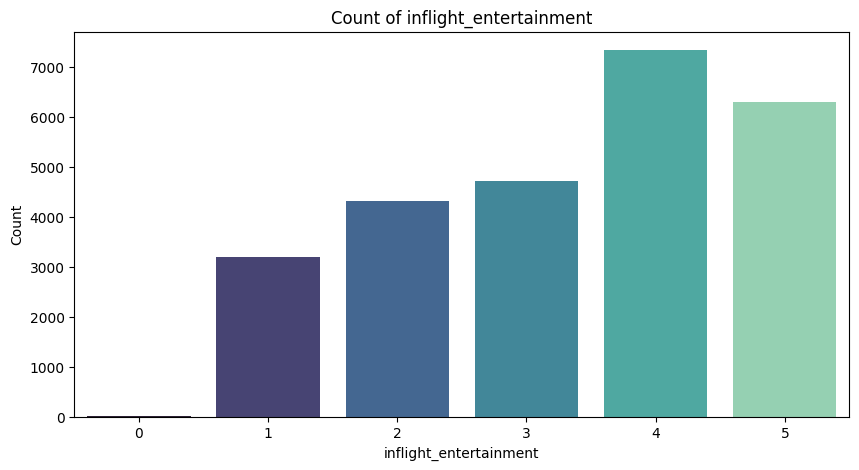

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


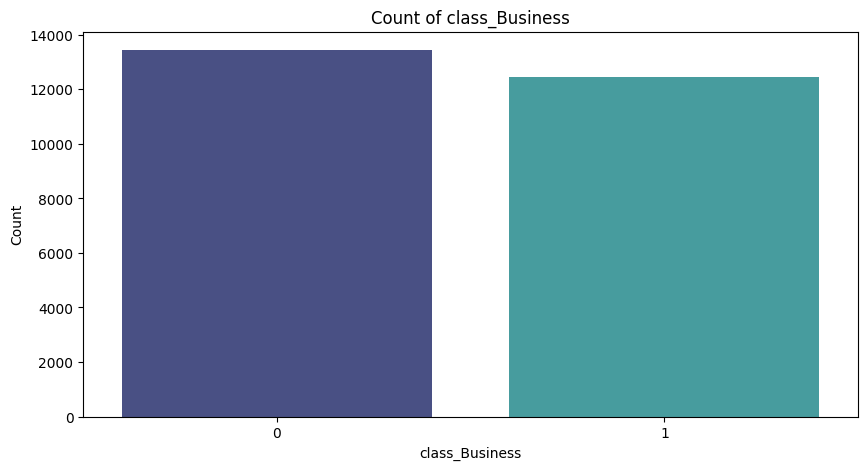

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


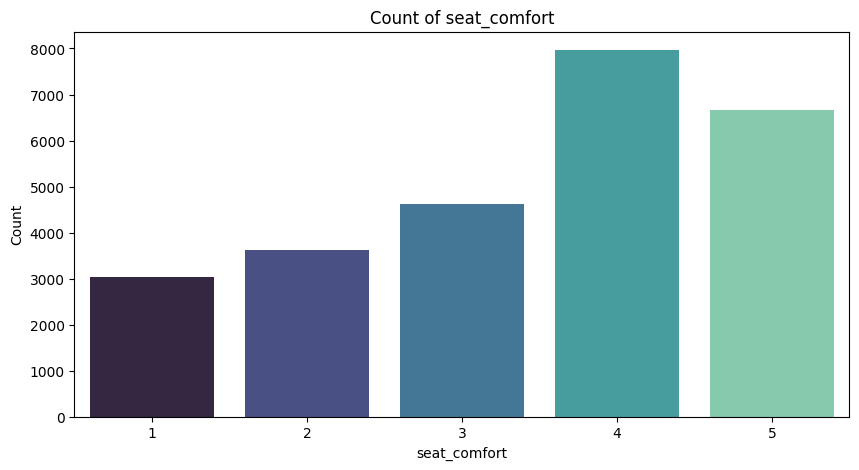

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


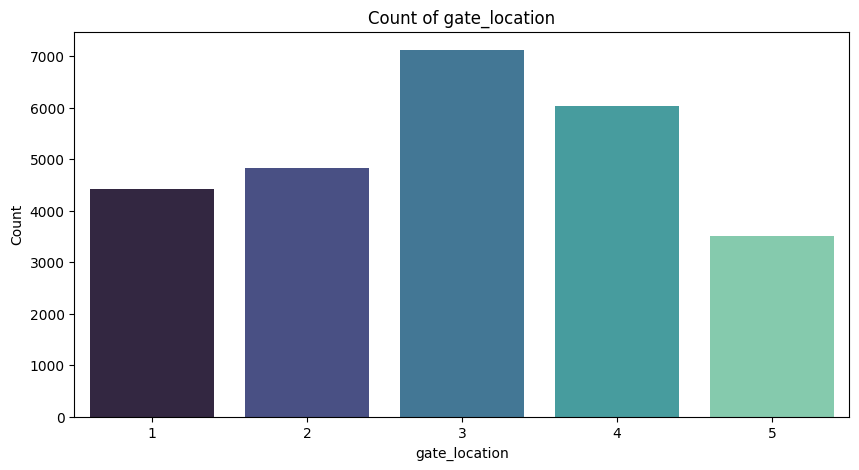

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


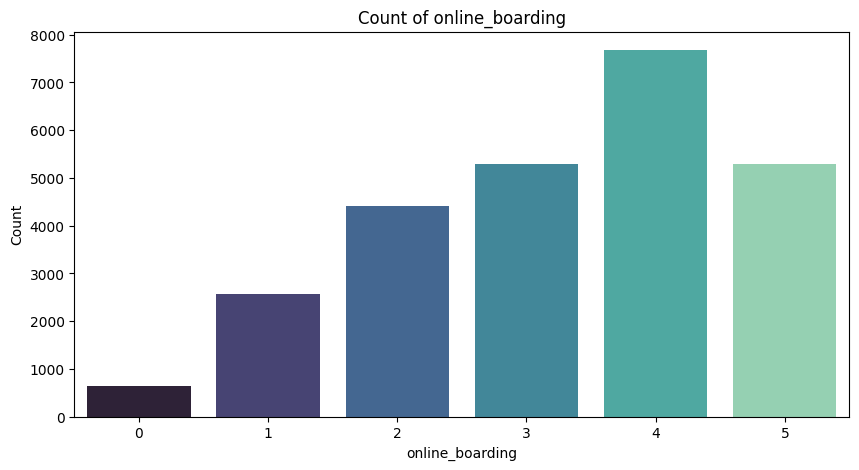

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


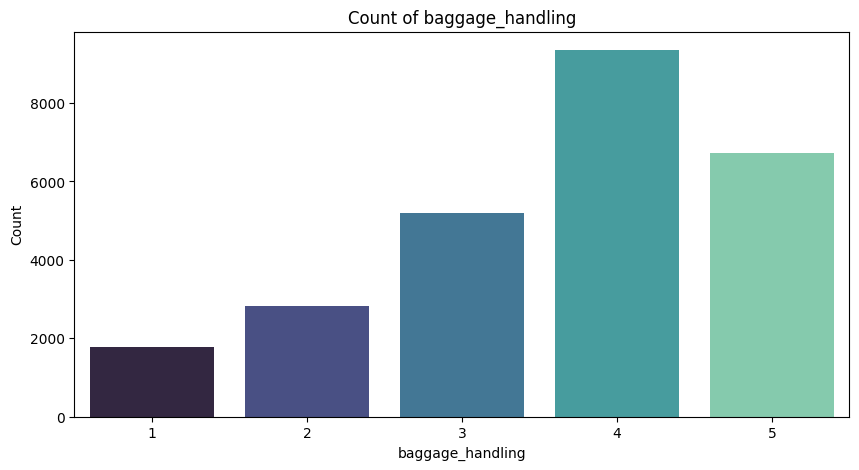

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


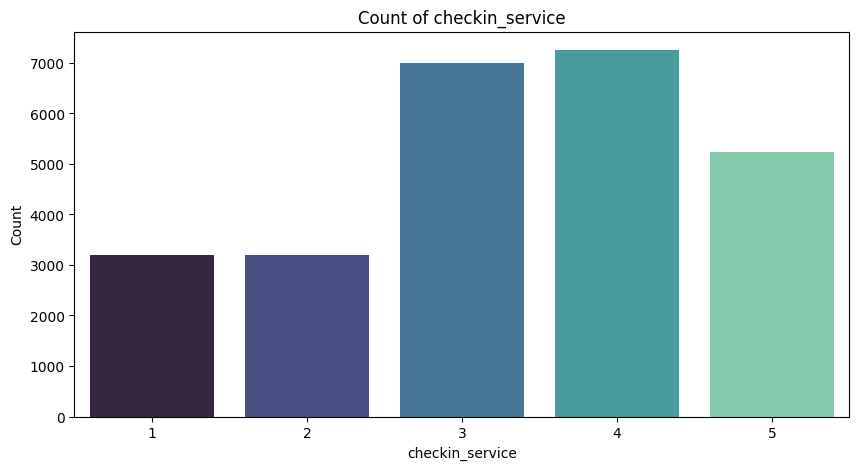

<ipython-input-26-50311765dfdc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=cmap)


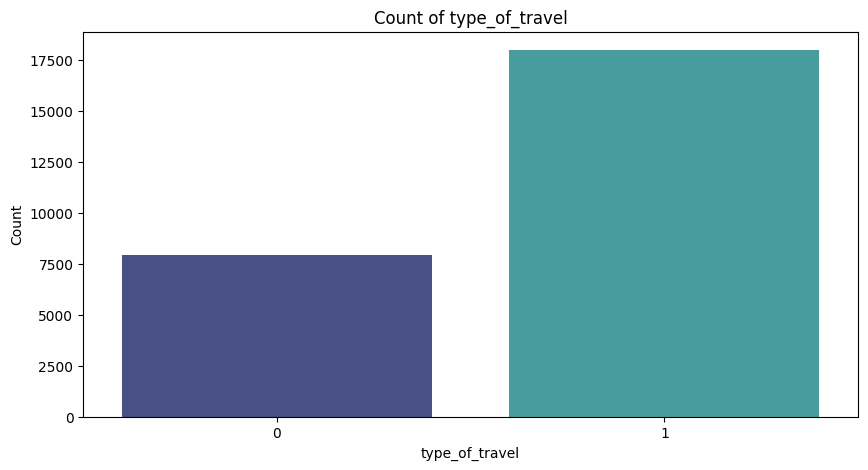

In [ ]:
# visualization 3
# counts of each column to then be visualized - visual distribution - and other counts and distributions for each vairable

df.columns

# how many counts in each part
for column in df.columns:
    print(df[column].value_counts())

numerical_variables = ["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]
categorical_variables = list(set(df.columns) - set(numerical_variables))

# visualizations for numerical variables
for column in numerical_variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True, color='teal')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# visaulizations for categorical variables
for column in categorical_variables:
    plt.figure(figsize=(10, 5))
    num_categories = len(df[column].unique())
    cmap = sns.color_palette("mako", num_categories)
    sns.countplot(data=df, x=column, palette=cmap)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Naive Rule

Majority rule of taking which result of satisfaction is the majority then predicting ALL as having that label. Label is neutral/disatisfied.

In [ ]:
# what is majority of satisfaction labels
majority_class = df['satisfaction'].mode()[0]

# predict the majority class
predicted_labels = [majority_class] * len(df)

# evaluate the accuracy of the naive classifier
correct_predictions = sum(df['satisfaction'] == predicted_labels)
accuracy = correct_predictions / len(df)
print("Accuracy of the majority class classifier:", round(accuracy, 2))

Accuracy of the majority class classifier: 0.56


# K-Nearest Neighbors

Grouping by majority and finding how many nearest neighbbors lead to high accuracy

In [ ]:
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

max_accuracy = 0
best_k = 0

# iterate over 20 k values to find best k for KNN
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    accuracy_test = accuracy_score(y_test, knn_model.predict(X_test))

    if accuracy_test > max_accuracy:
        max_accuracy = accuracy_test
        best_k = k

print("Best k =", best_k)

Best k = 9


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

y_train_knn = knn_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_knn)

y_test_knn = knn_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_knn)

print("Accuracy on training set:", accuracy_train)
print("Accuracy on testing set:", accuracy_test)

cm_knn = confusion_matrix(y_test, y_test_knn)
cmap = sns.color_palette("mako", as_cmap=True)
cmap = cmap.reversed()
sns.heatmap(cm_knn, annot=True, square=True, fmt='1', cmap=cmap)
plt.title('KNN - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Logistic Regression, Ridge, Lasso

In [ ]:
# DEFAULT LOGISTIC REGRESSION

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# predictors and target
X = df.drop(columns='satisfaction')
y = df['satisfaction']


lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_pred = lr.predict(X_test)
lr_train_accuracy = round(accuracy_score(y_train, lr_train_pred),3)

lr_accuracy = round(accuracy_score(y_test, lr_pred), 3)
lr_precision = round(precision_score(y_test, lr_pred),3)
lr_recall = round(recall_score(y_test, lr_pred),3)
lr_f1 = round(f1_score(y_test, lr_pred),3)


print("Logistic Regression Metrics:")
print("Training Accuracy:", lr_train_accuracy)
print("Accuracy:", lr_accuracy)
print("Precision:",  lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

In [ ]:
# LASSO REGRESSION WITH GRIDSEARCHCV
# splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# predictors and target

X = df.drop(columns='satisfaction')
y = df['satisfaction']

# grid search w/ cross validation

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
logreg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X, y)
best_c = grid_search.best_params_['C']
print(best_c)

# lasso regression (L1)

lasso_model = LogisticRegression(C=best_c, penalty='l1', solver='liblinear', max_iter=1000)
lasso_model.fit(X_train, y_train)

lasso_train_pred = lasso_model.predict(X_train)
lasso_pred = lasso_model.predict(X_test)

lasso_train_accuracy = round(accuracy_score(y_train, lasso_train_pred),3)
lasso_accuracy = round(accuracy_score(y_test, lasso_pred),3)
lasso_precision = round(precision_score(y_test, lasso_pred), 3)
lasso_recall = round(recall_score(y_test, lasso_pred), 3)
lasso_f1 = round(f1_score(y_test, lasso_pred), 3)

# model evaluations

print("Lasso Regression Metrics:")
print("Training Accuracy:", lasso_train_accuracy)
print("Accuracy:", lasso_accuracy)
print("Precision:", lasso_precision)
print("Recall:", lasso_recall)
print("F1 Score:", lasso_f1)

In [ ]:
# RIDGE REGRESSION WITH GRIDSEARCH CV
# ridge regression (L2)

ridge_model = LogisticRegression(C=best_c, penalty='l2', solver='liblinear', max_iter=1000)
ridge_model.fit(X_train, y_train)

ridge_train_pred = ridge_model.predict(X_train)
ridge_pred = ridge_model.predict(X_test)


ridge_train_accuracy = round(accuracy_score(y_train, ridge_train_pred),3)
ridge_accuracy = round(accuracy_score(y_test, ridge_pred),3)
ridge_precision = round(precision_score(y_test, ridge_pred),3)
ridge_recall = round(recall_score(y_test, ridge_pred),3)
ridge_f1 = round(f1_score(y_test, ridge_pred),3)


print("Ridge Regression Metrics:")
print("Training Accuracy: ",ridge_train_accuracy )
print("Accuracy:", ridge_accuracy)
print("Precision:", ridge_precision)
print("Recall: ",ridge_recall)
print("F1 Score: " ,ridge_f1)

# Decision Trees, Bagging

In [ ]:
# default decision tree
# full tree no pruning
X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)


train_accuracy = round(accuracy_score(y_train, y_train_pred), 2)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 2)

print("Training accuracy full tree:", train_accuracy)
print("Testing accuracy full tree:", test_accuracy)

plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=True)
plt.show()

This full tree very much overfits the data because it fits the training data 100%.

In [ ]:
# simple parameter tuning SOME tuning parameters and cross validation to simplify and reduce
X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(min_samples_split = 9, max_depth = 3)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy with hyperparameters and CV:", train_accuracy)

y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing accuracy with hyperparameters and CV:", test_accuracy)

cv_scores = cross_val_score(dt, X_train, y_train, cv = 10, scoring='accuracy')
print("Cross-Validation mean accuracy:", cv_scores.mean())

# for final decision tree getting original labels as class labels
y_str = y.astype(str)
class_names = np.unique(y_str)
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [ ]:
# tuning the tree by finding ideal CCP (cost complexity pruning) alpha setting
ccp_alphas = [0.0001, 0.001, 0.01, 0.1, 1]
results = {}

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)

    scores = cross_val_score(tree, X_train, y_train, cv=10)
    mean_score = np.mean(scores)
    results[ccp_alpha] = mean_score

best_alpha = max(results, key=results.get)
print("Best alpha:", best_alpha)

best_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_tree.fit(X_train, y_train)

y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy with best alpha DT:", train_accuracy)
print("Testing Accuracy with best alpha DT:", test_accuracy)

plt.figure(figsize=(40, 20))
plot_tree(best_tree, filled=True, feature_names=X_train.columns, class_names=True, fontsize=10)
plt.title("Pruned Decision Tree With CCP Alpha")
plt.show()

In [ ]:
# now try a dt that brings in GRIDSEARCH for tuning parameters and cross validation and finds the BEST

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = {'min_samples_split': list(range(2, 11)),  'max_depth': list(range(3, 9))}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, parameters, cv = 10, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best decision tree parameters from the gridsearch
best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

mean_cv_accuracy = grid_search.cv_results_['mean_test_score'].mean()
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

y_train_pred = best_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training accuracy with GridSearchCV DT:", train_accuracy)

y_test_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing accuracy with GridSearchCV DT:", test_accuracy)

# for final decision tree getting original labels as class labels
y_str = y.astype(str)
class_names = np.unique(y_str)
plt.figure(figsize=(15,10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show

### Bagging Classifier for a Decision Tree

use the ccp alpha tree since it had the greatest accuracy of the pruned decision trees

In [ ]:
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha), n_estimators=10, random_state=42)

scores = cross_val_score(bagging_dt, X_train, y_train, cv=10)
bagging_dt.fit(X_train, y_train)

train_accuracy_bagging = bagging_dt.score(X_train, y_train)
test_accuracy_bagging = bagging_dt.score(X_test, y_test)

print("Training accuracy with bagging classifier:", train_accuracy_bagging)
print("Testing accuracy with bagging classifier:", test_accuracy_bagging)

base_estimator = bagging_dt.estimators_[0]
plt.figure(figsize=(40, 20))
plot_tree(base_estimator, filled=True, feature_names=X_train.columns, class_names=True, fontsize=10)
plt.title("Decision Tree from Bagging Classifier")
plt.show()

# Random Forest

In [ ]:
# DEFAULT parameters and hyperparameters

X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

print("---Random Forest Classifier Default Model Results---")
print('TRAINING Accuracy Score:', round(accuracy_score(y_train, y_pred_train_rf), 2))
print('TESTING Accuracy Score', round(accuracy_score(y_test, y_pred_rf), 2))
print('F1 Score Test Set', round(f1_score(y_test, y_pred_rf, average="weighted"), 2), '\n')


cm_rf = confusion_matrix(y_test, y_pred_rf)
cmap = sns.color_palette("mako", as_cmap=True)
cmap = cmap.reversed()
sns.heatmap(cm_rf, annot=True, square=True, fmt='1', cmap=cmap)
plt.title('Default Random Forest - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# DEFAULT features are most important for classification

importances_rf = rf.feature_importances_
df_importance_rf = pd.DataFrame({'feature': X_train.columns, 'importance': importances_rf})
df_importance_rf = df_importance_rf.sort_values('importance', ascending=False).head(10)

ax_rf = df_importance_rf.plot(kind='bar', x='feature', title='RF Feature Importance - Default', color = 'teal')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Now run GridSearch for best hyperparameters with 10 folds instead of 5 (which is the default in CV)

############ takes 40 minutes to run!!!!!!!

# now perform gridsearch to find best parameters for the random forest
rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

rf_cv = RandomForestClassifier()
rf_grid = GridSearchCV(rf_cv, rf_parameters, cv=10).fit(X_train, y_train)
print("Best parameters of Random Forest:", str(rf_grid.best_params_))

In [ ]:
# RF with best CV folds, parameters and hyperparameters
# use stratified k fold because it keeps the balance of the outcome as equal

best_params = {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 100}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_tuned = RandomForestClassifier(**best_params)
cv_scores = cross_val_score(rf_tuned, X, y, cv=cv, scoring='accuracy')

print("Average Cross-Validation Score:", round(cv_scores.mean(), 2))
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)


print("---TUNED Random Forest Classifier Model Results ---")
print('TRAINING Accuracy:', round(accuracy_score(y_train, rf_tuned.predict(X_train)), 2))
print('TESTING ACCURACY:', round(accuracy_score(y_test, y_pred_rf_tuned), 2))
print('F1 Score Test Set:', round(f1_score(y_test, y_pred_rf_tuned, average="weighted"), 2), '\n')


cm_rf = confusion_matrix(y_test, y_pred_rf_tuned)
cmap = sns.color_palette("mako", as_cmap=True)
cmap = cmap.reversed()
sns.heatmap(cm_rf, annot=True, square=True, fmt='1', cmap=cmap)
plt.title('Tuned and GridSearch CV Random Forest - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# features are most important for classification
importances_rf = rf_tuned.feature_importances_
df_importance_rf = pd.DataFrame({'feature': X_train.columns, 'importance': importances_rf})
df_importance_rf = df_importance_rf.sort_values('importance', ascending=False).head(10)

# plot for TUNED
ax_rf = df_importance_rf.plot(kind='bar', x='feature', title='RF Feature Importance - Tuned and GridSearch CV', color='teal')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

# Neural Network

In [ ]:
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

hidden_layer_sizes = [(5,), (10,), (15,)]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

for hidden_layer_size in hidden_layer_sizes:
    nn_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation='relu', solver='adam', max_iter=1000)
    nn_clf.fit(X_train, y_train)

    # calculate training accuracy
    train_accuracy = nn_clf.score(X_train, y_train)

    # calculate testing accuracy
    test_accuracy = nn_clf.score(X_test, y_test)

    print("Hidden Layer Size:", hidden_layer_size, "Training Accuracy:", train_accuracy, "Testing Accuracy:", test_accuracy)

Hidden Layer Size: (5,) Training Accuracy: 0.5610698078594187 Testing Accuracy: 0.5611121838192701
Hidden Layer Size: (10,) Training Accuracy: 0.9052814521579609 Testing Accuracy: 0.8997876037845144
Hidden Layer Size: (15,) Training Accuracy: 0.9253644877860384 Testing Accuracy: 0.9208341378644526


# Stacking Classifiers

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

More information about stacking classfiers: https://tinyurl.com/3963fb74

In [ ]:
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier(random_state=42, ccp_alpha=0.0001)), #best DT from initial analysis
    ('knn', KNeighborsClassifier(n_neighbors=9)) #best KNN from initial
]

# define meta classifier
meta_classifier = RandomForestClassifier(max_depth = 6, max_features = None, max_leaf_nodes = 9, n_estimators = 100) #best hyperparameters from initial
stacking_classifier = StackingClassifier(estimators=base_classifiers,final_estimator=meta_classifier)
stacking_classifier.fit(X_train, y_train)

train_predictions = stacking_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = stacking_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

cm_stacked = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm_stacked, annot=True, square=True, fmt='d', cmap='mako')
plt.title('Stacked Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Feature Engineering
Inflight Wifi Service having a high value of satisfaction is overall the 2nd most popular - what would happen if we add a column and squared that value then would it become the most important feature over the resounding favorite of online boarding

In [ ]:
df

In [ ]:
df['inflight_wifi_service^2'] = df['inflight_wifi_service'] ** 2
df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy with Bagging Classifier: 0.98
Testing Accuracy with Bagging Classifier: 0.95


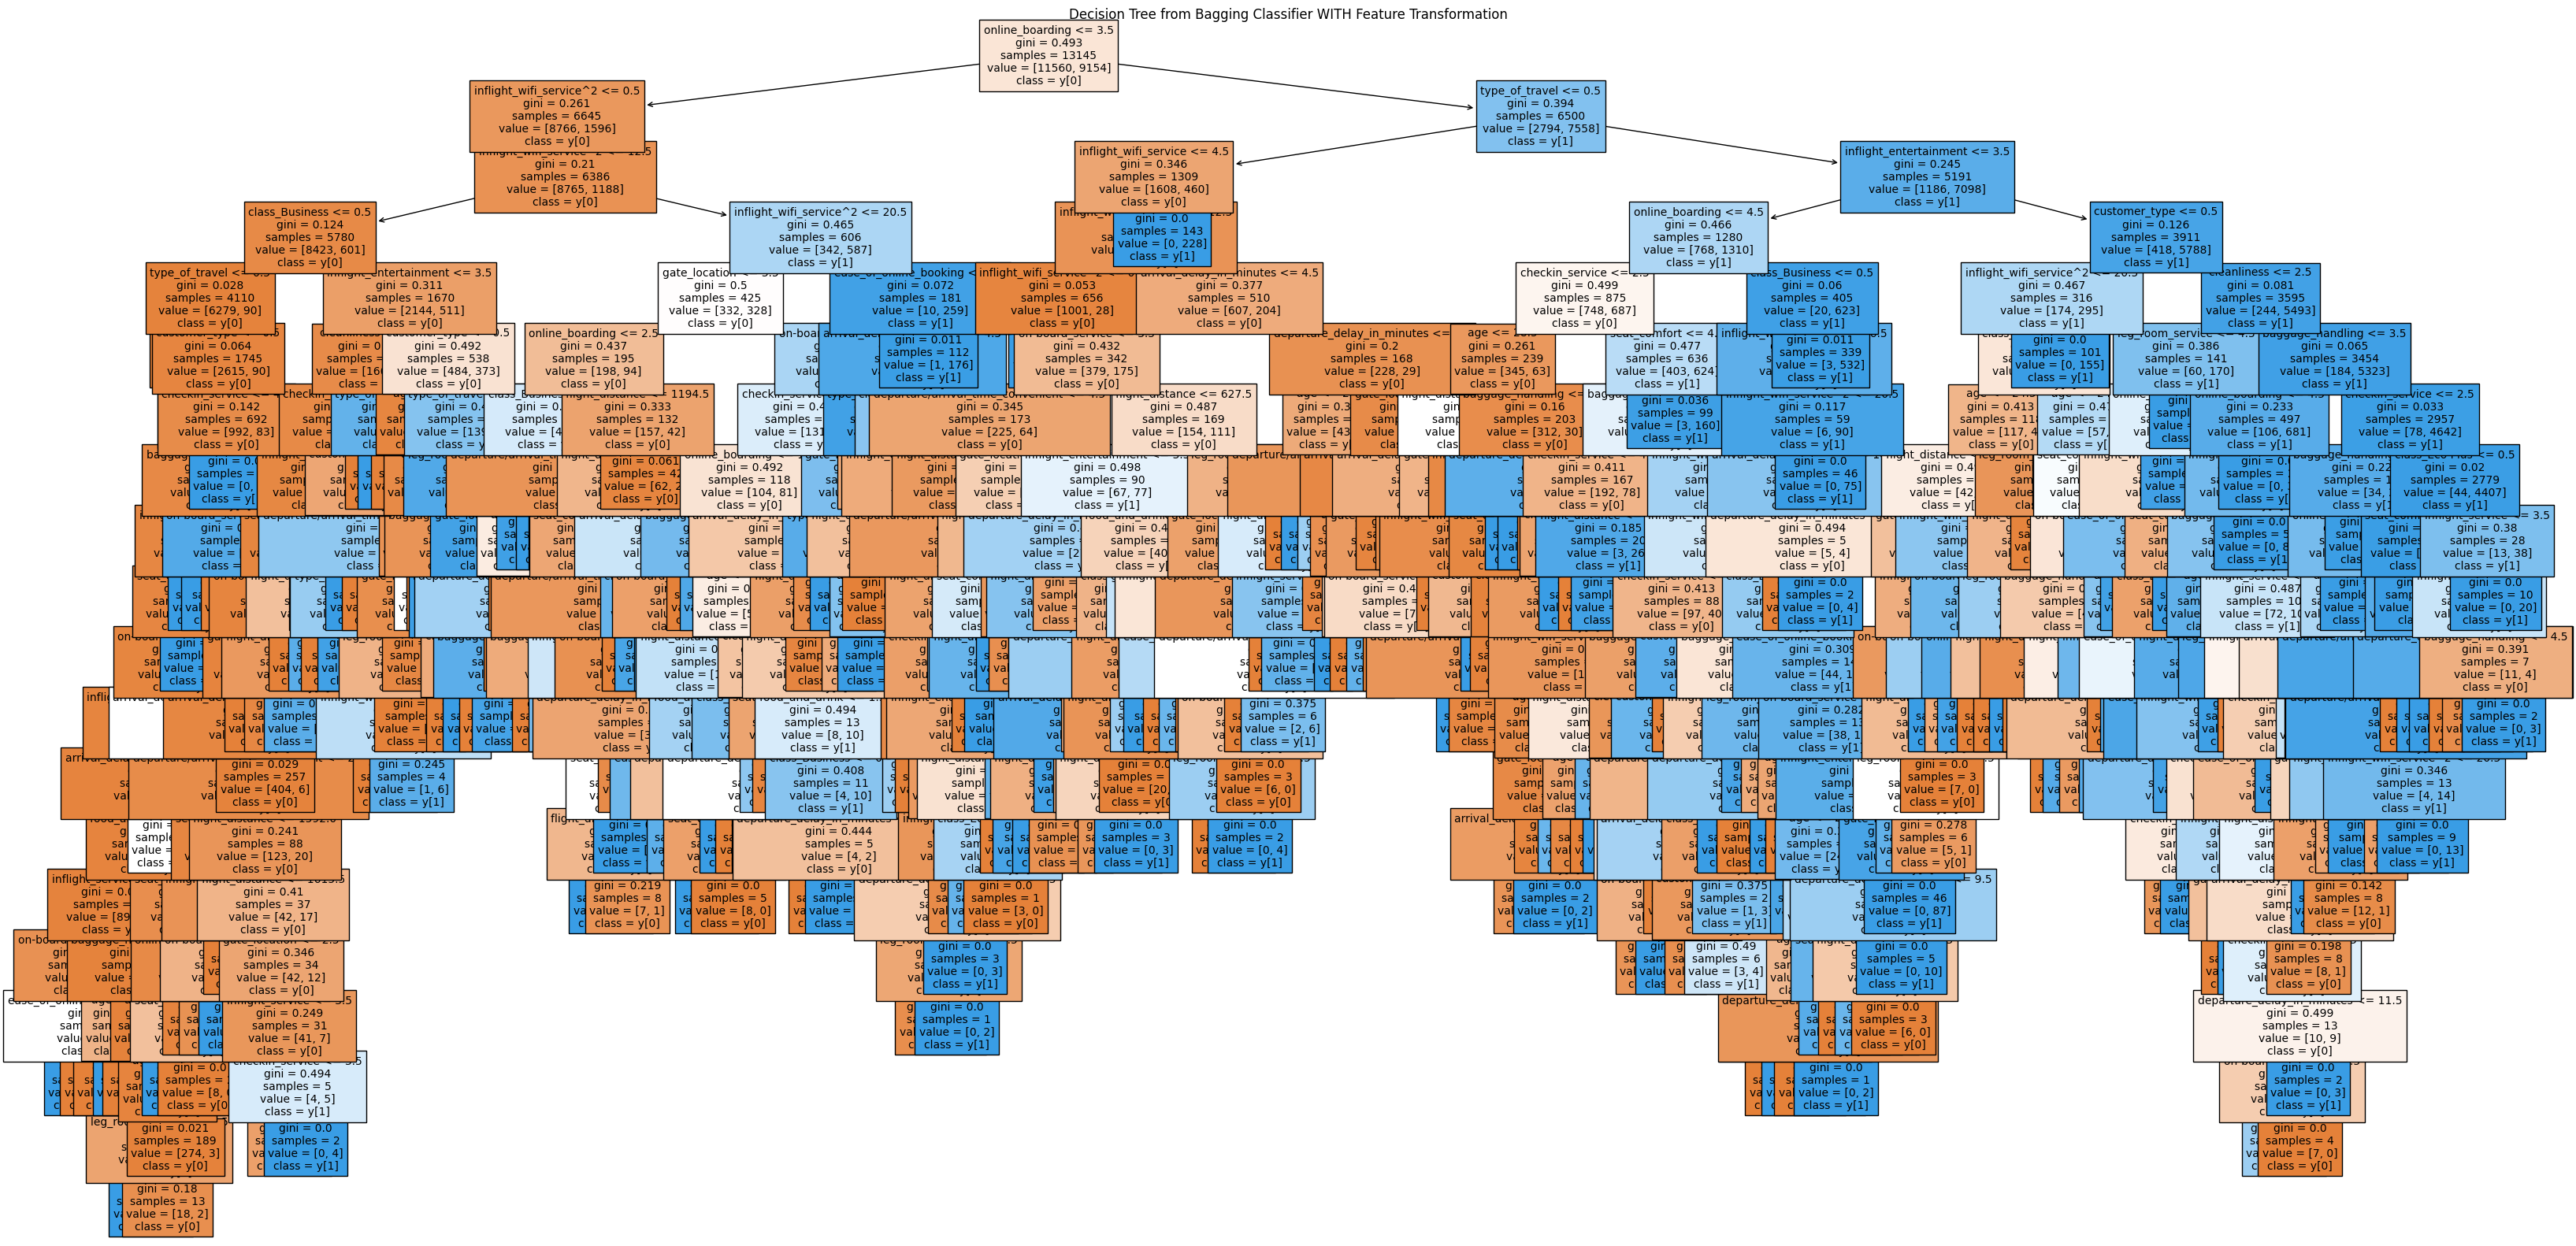

In [ ]:
# copied from earlier but then with the "new" data set
X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, ccp_alpha=0.0001), n_estimators=10, random_state=42)

bagging_dt.fit(X_train, y_train)

train_accuracy_bagging = bagging_dt.score(X_train, y_train)
test_accuracy_bagging = bagging_dt.score(X_test, y_test)
print(f"Training Accuracy with Bagging Classifier: {train_accuracy_bagging:.2f}")
print(f"Testing Accuracy with Bagging Classifier: {test_accuracy_bagging:.2f}")

base_estimator = bagging_dt.estimators_[0]
plt.figure(figsize=(40, 20))
plot_tree(base_estimator, filled=True, feature_names=X_train.columns, class_names=True, fontsize=10)
plt.title("Decision Tree from Bagging Classifier WITH Feature Transformation ")
plt.show()